In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()



In [2]:
data = pd.read_csv('datasets/smoke_detection_iot.csv', encoding='utf-8' )
display(data)
dataset= fit_cols(data,data.columns,Min_Max)
data.head(20)


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0.000000,0.050600,0.512692,0.723239,0.0,0.000000,0.522488,0.525685,0.986014,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0
1,0.000016,0.050603,0.512875,0.712535,0.0,0.000000,0.534928,0.547185,0.987013,0.000000,0.000000,0.0,0.000000,0.000000,0.00004,0.0
2,0.000032,0.050605,0.513046,0.701520,0.0,0.000000,0.544179,0.565731,0.986347,0.000000,0.000000,0.0,0.000000,0.000000,0.00008,0.0
3,0.000048,0.050607,0.513229,0.690971,0.0,0.000000,0.549282,0.579682,0.986125,0.000000,0.000000,0.0,0.000000,0.000000,0.00012,0.0
4,0.000064,0.050610,0.513412,0.681818,0.0,0.000000,0.553429,0.591498,0.987013,0.000000,0.000000,0.0,0.000000,0.000000,0.00016,0.0
5,0.000080,0.050612,0.513583,0.672975,0.0,0.000000,0.558533,0.604136,0.984904,0.000000,0.000000,0.0,0.000000,0.000000,0.00020,0.0
6,0.000096,0.050615,0.513766,0.665064,0.0,0.000000,0.562679,0.613983,0.986347,0.000000,0.000000,0.0,0.000000,0.000000,0.00024,0.0
7,0.000112,0.050617,0.513949,0.658703,0.0,0.000000,0.564912,0.623174,0.988567,0.000000,0.000000,0.0,0.000000,0.000000,0.00028,0.0
8,0.000128,0.050619,0.514120,0.652653,0.0,0.000000,0.567783,0.629903,0.988567,0.000000,0.000000,0.0,0.000000,0.000000,0.00032,0.0
9,0.000144,0.050622,0.514303,0.647223,0.0,0.000000,0.569378,0.636468,0.988345,0.000063,0.000083,0.0,0.000084,0.000093,0.00036,0.0


In [3]:
X_train,X_test , Y_train, Y_test = split_Dataset(data,['Fire Alarm'])

In [4]:
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(50104, 15) (50104, 1)
(12526, 15) (12526, 1)


In [5]:

from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.001)
Sgd=optimizers.SGD(lr=0.09)



C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=15,activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(15,activation='relu', kernel_initializer='random_uniform'))   
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=Sgd,
                  metrics=['accuracy'])
    return model

def Model2():
    model = Sequential()
    model.add(Dense(80,input_dim=15,activation='sigmoid'))
    model.add(Dense(15,activation='sigmoid'))   
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam,
                  metrics=['accuracy'])
    return model

M=Model2()


Epoch 1/5
50104/50104 [==============================] - 77s 2ms/step - loss: 0.1158 - accuracy: 0.9629 - val_loss: 0.0797 - val_accuracy: 0.9804
Epoch 2/5
50104/50104 [==============================] - 73s 1ms/step - loss: 0.0780 - accuracy: 0.9789 - val_loss: 0.0700 - val_accuracy: 0.9832
Epoch 3/5
50104/50104 [==============================] - 70s 1ms/step - loss: 0.0725 - accuracy: 0.9809 - val_loss: 0.0657 - val_accuracy: 0.9839
Epoch 4/5
50104/50104 [==============================] - 75s 1ms/step - loss: 0.0695 - accuracy: 0.9818 - val_loss: 0.0654 - val_accuracy: 0.9840
Epoch 5/5
50104/50104 [==============================] - 75s 1ms/step - loss: 0.0685 - accuracy: 0.9820 - val_loss: 0.0648 - val_accuracy: 0.9837


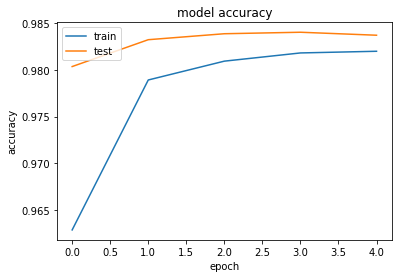

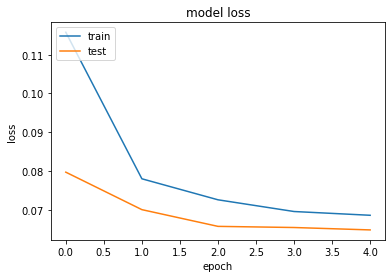

In [9]:
History=M.fit(X_train,Y_train,
              epochs=5,
              batch_size=1,
              validation_data=(X_test,Y_test))

Show_History(History)